<a href="https://colab.research.google.com/github/Ankitkumar853/Netflix-Data-Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from textblob import TextBlob
import seaborn as sns
from matplotlib import pyplot as plt

netflix = pd.read_csv('netflix_titles.csv')

In [ ]:
netflix.shape

(8807, 12)

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
x=netflix.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


In [ ]:
piechart = px.pie(x,values='counts',names='rating',title='Distribution of content ratings on netflix')
piechart.show()

NameError: name 'px' is not defined

In [ ]:
netflix['director']=netflix['director'].fillna('director not specified')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
director_list=pd.DataFrame()
print(director_list)

Empty DataFrame
Columns: []
Index: []


In [ ]:
director_list=df['director'].str.split(',',expand=True).stack()
print(director_list)

0     0           Kirsten Johnson
1     0    director not specified
2     0           Julien Leclercq
3     0    director not specified
4     0    director not specified
                    ...          
8802  0             David Fincher
8803  0    director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [ ]:
director_list=director_list.to_frame()
print(director_list)

                             0
0    0         Kirsten Johnson
1    0  director not specified
2    0         Julien Leclercq
3    0  director not specified
4    0  director not specified
...                        ...
8802 0           David Fincher
8803 0  director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
netflix.cast.fillna(value = "unknown", inplace = True)
netflix.cast


,cast
0,unknown
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,unknown
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...
8802,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,unknown
8804,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [ ]:
netflix.country.fillna(value="unknown", inplace =True)
netflix.country


,country
0,United States
1,South Africa
2,unknown
3,unknown
4,India
...,...
8802,United States
8803,unknown
8804,United States
8805,United States


In [ ]:
netflix.date_added.fillna(value = "unknown", inplace = True)
netflix.date_added

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
...,...
8802,"November 20, 2019"
8803,"July 1, 2019"
8804,"November 1, 2019"
8805,"January 11, 2020"


In [ ]:
netflix.dropna(inplace = True)

In [ ]:
netflix.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
netflix.type.value_counts().index


Index(['Movie', 'TV Show'], dtype='object', name='type')

In [ ]:
netflix.type.unique

<bound method Series.unique of 0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8800, dtype: object>

In [ ]:
netflix.type.value_counts()

,count
type,
Movie,6126
TV Show,2674


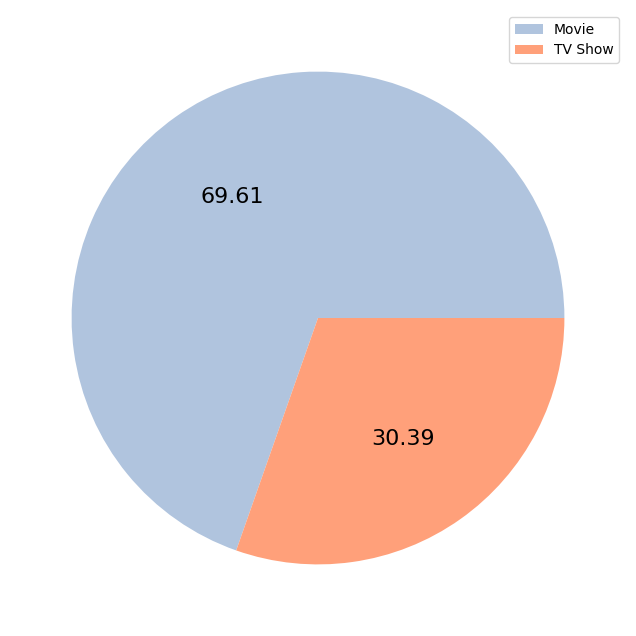

In [ ]:
plt.figure(figsize=(10,8))

plt.pie(netflix.type.value_counts(),
        labels = netflix.type.value_counts().index,
        labeldistance = None, autopct="%.2f",
        textprops = {'fontsize': 16,},
        colors = ['lightsteelblue','lightsalmon' ] )
plt.legend()
plt.show()

In [ ]:
last_decade = netflix[["type", "release_year"]]
last_decade = last_decade.rename(columns = {"release_year" : "Release Year"})
last_decade = last_decade[last_decade["Release Year"]>=2010]
last_decade

,type,Release Year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8798,Movie,2014
8800,TV Show,2012
8801,Movie,2015
8803,TV Show,2018


In [ ]:
last_decade_df = last_decade.groupby("Release Year")["type"].size().reset_index()
last_decade_df = pd.DataFrame(last_decade_df)
last_decade_df

,Release Year,type
0,2010,193
1,2011,185
2,2012,237
3,2013,287
4,2014,352
5,2015,557
6,2016,902
7,2017,1030
8,2018,1147
9,2019,1030


In [ ]:
last_decade.groupby("Release Year")["type"].value_counts()

Release Year  type   
2010          Movie      153
              TV Show     40
2011          Movie      145
              TV Show     40
2012          Movie      173
              TV Show     64
2013          Movie      225
              TV Show     62
2014          Movie      264
              TV Show     88
2015          Movie      396
              TV Show    161
2016          Movie      658
              TV Show    244
2017          Movie      765
              TV Show    265
2018          Movie      767
              TV Show    380
2019          Movie      633
              TV Show    397
2020          Movie      517
              TV Show    436
2021          TV Show    315
              Movie      277
Name: count, dtype: int64

''

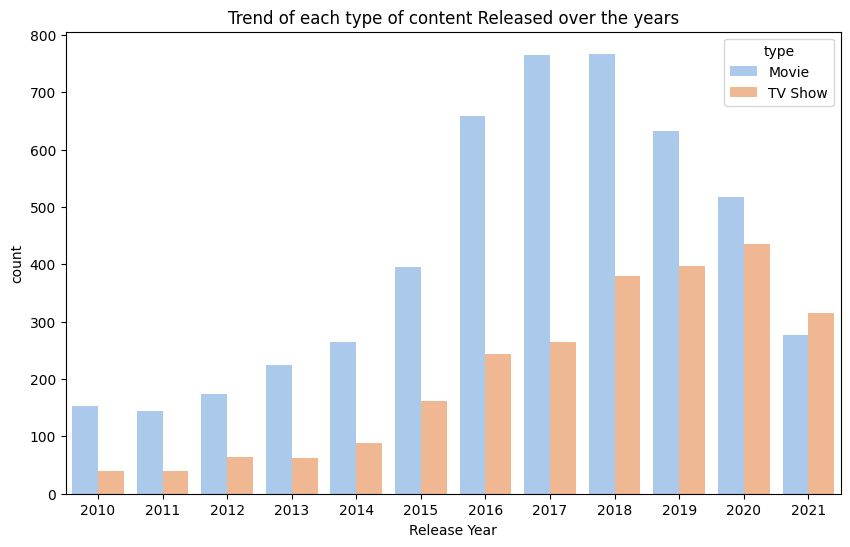

In [ ]:
plt.figure(figsize = (10,6))
count_plot = sns.countplot(x = "Release Year", data = last_decade, hue="type",
             palette= "pastel")
count_plot.set(title = "Trend of each type of content Released over the years")
;

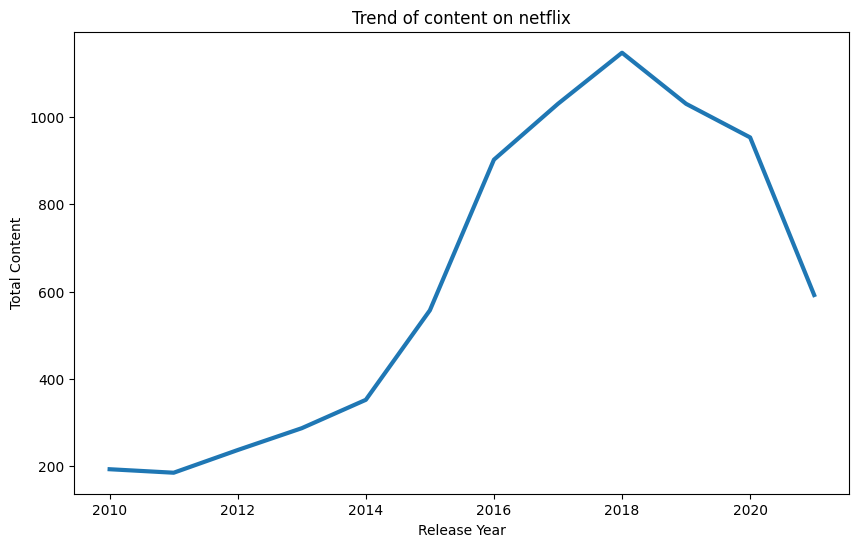

In [ ]:
last_decade_df.rename(columns = {"type": "Total Content"}, inplace = True)
plt.figure(figsize = (10,6))
plot_total_content= sns.lineplot(x= "Release Year", y = "Total Content", data = last_decade_df, linewidth = 3)
plot_total_content.set(xlabel = "Release Year", ylabel = "Total Content", title = "Trend of content on netflix")
plt.show()


In [ ]:
top_10_countries= netflix.country.value_counts().head(10)
top_10_countries = pd.DataFrame(top_10_countries)
top_10_countries

,count
country,
United States,2815
India,972
unknown,830
United Kingdom,419
Japan,244
South Korea,199
Canada,181
Spain,145
France,124


<ipython-input-53-05fcf41d4db4>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




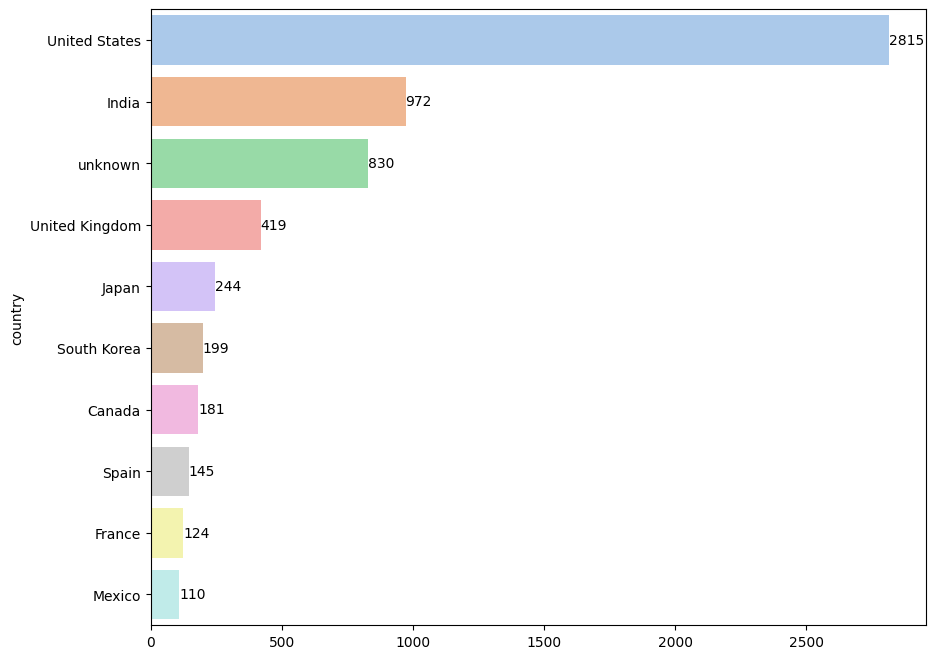

In [ ]:
plt.figure(figsize = (10,8))
country_plot = sns.barplot(x = netflix.country.value_counts()[:10].values,
                           y= netflix.country.value_counts()[:10].index,palette = "pastel")
for i in country_plot.containers:
    country_plot.bar_label(i);

<ipython-input-54-923c9068788b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




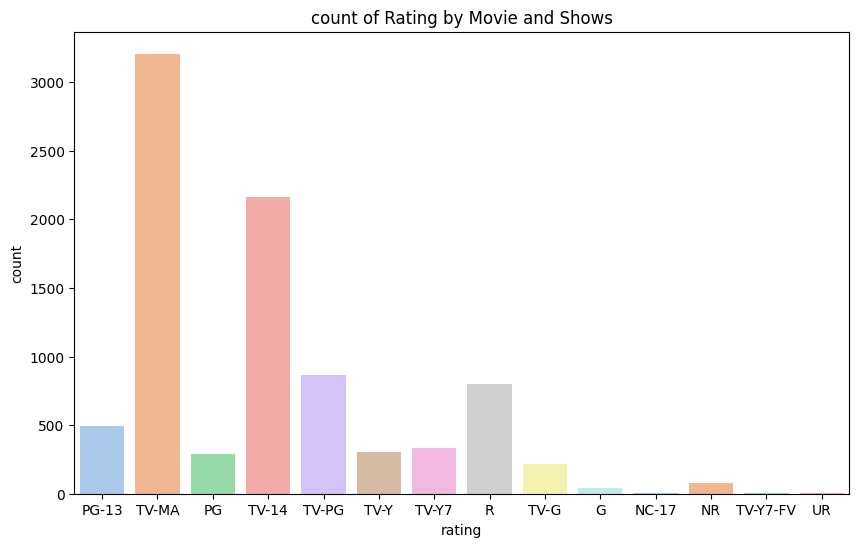

In [ ]:
plt.figure(figsize= (10,6))
sns.countplot(x="rating", data=netflix, palette="pastel",)
plt.title("count of Rating by Movie and Shows");